In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Set date range

In [3]:
# specify the date range we wish to plot
date_range = pd.date_range('01-01-2006', datetime.today().date())

# Load csv

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/collective-action/tech/master/actions.csv")
df["date"] = pd.to_datetime(df["date"])  # cast date col to datetime64
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs,addresses
0,1,1979-09-01,['https://twitter.com/clancynewyork/status/117...,['protest'],['ethics'],['white_collar_workers'],"IBM workers formed an organization, IBM: Speak...",None,['worldwide'],['ibm'],None,['international_solidarity'],['nataliyaned'],None,None
1,2,1986-09-16,['https://www.nytimes.com/1986/09/16/science/s...,['open_letter'],['ethics'],['white_collar_workers'],Fourteen employees at AT&T sign a letter warni...,None,['usa'],['at&t'],14,None,['nataliyaned'],"[(45.5733162, -122.5587111463347)]","['10025, Northeast Cascades Parkway, Portland,..."
2,3,1986-09-16,['https://www.nytimes.com/1986/09/16/science/s...,['open_letter'],['ethics'],['white_collar_workers'],"A group of computer professionals, led by Comp...",None,['usa'],None,30,None,['nataliyaned'],"[(39.7837304, -100.4458825)]",['United States']
3,4,1994-01-24,['https://www.nytimes.com/1994/06/12/magazine/...,['open_letter'],['ethics'],['white_collar_workers'],Computer Professionals for Social Responsibili...,True,None,None,50000,None,['nataliyaned'],None,None
4,5,1998-11-23,['http://www.cnn.com/tech/computing/9811/23/ms...,['legal_action'],"['unfair_labor_practices', 'pay_and_benefits']",['contract_workers'],A law firm representing 10 current and former ...,None,['usa'],['microsoft'],10,None,['organizejs'],"[(35.139622349999996, -80.92306993327955)]","['Microsoft, Yorkwood, Charlotte, Mecklenburg ..."


# Visualizations

## Actions

In [5]:
df["actions"].unique()

array(["['protest']", "['open_letter']", "['legal_action']",
       "['union_drive']", "['union_representation']",
       "['legal_action', 'protest']", "['strike']",
       "['strike', 'protest']", "['protest', 'open_letter']",
       "['open_letter', 'protest']", "['strike', 'union_drive']",
       "['open_letter', 'strike']",
       "['union_representation', 'union_drive']",
       "['open_letter', 'legal_action']", "['strike', 'open_letter']",
       "['protest', 'strike']"], dtype=object)

In [7]:
df.groupby("actions").count()["id"]

actions
['legal_action', 'protest']                 1
['legal_action']                           17
['open_letter', 'legal_action']             1
['open_letter', 'protest']                  2
['open_letter', 'strike']                   4
['open_letter']                            65
['protest', 'open_letter']                  4
['protest', 'strike']                       2
['protest']                                90
['strike', 'open_letter']                   1
['strike', 'protest']                       5
['strike', 'union_drive']                   1
['strike']                                 45
['union_drive']                            14
['union_representation', 'union_drive']     1
['union_representation']                   22
Name: id, dtype: int64

In [10]:
actions = ["legal_action", "open_letter", "protest", "strike", "union_drive", "union_representation"]
actions_count = []
for a in actions:
    actions_count.append(sum(df["actions"].str.contains(a)))

In [11]:
actions_df = pd.DataFrame({"Actions": actions, "Count": actions_count})
actions_df.head()

,Actions,Count
0,legal_action,19
1,open_letter,77
2,protest,104
3,strike,58
4,union_drive,16


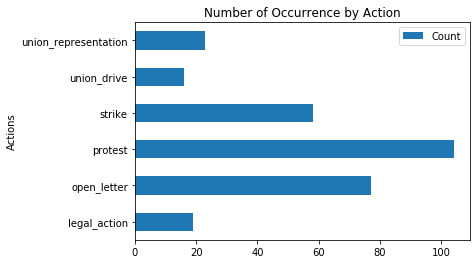

In [36]:
actions_df.plot(kind = "barh", x = "Actions", y = "Count", title = "Number of Occurrence by Action")

plt.show()

## Employment Types

In [26]:
df.groupby(["employment_types"]).count()["id"]

employment_types
['blue_collar_workers', 'contract_workers']                    7
['blue_collar_workers', 'gig_workers']                         2
['blue_collar_workers', 'in_house_workers']                    9
['blue_collar_workers', 'white_collar_workers']                1
['blue_collar_workers']                                       37
['contract_workers', 'blue_collar_workers']                    5
['contract_workers', 'gig_workers']                            4
['contract_workers', 'white_collar_workers']                   1
['contract_workers']                                          12
['gig_workers', 'blue_collar_workers']                         1
['gig_workers']                                               60
['in_house_workers', 'blue_collar_workers', 'gig_workers']     1
['in_house_workers', 'blue_collar_workers']                    8
['in_house_workers']                                           2
['na']                                                        30
['white_

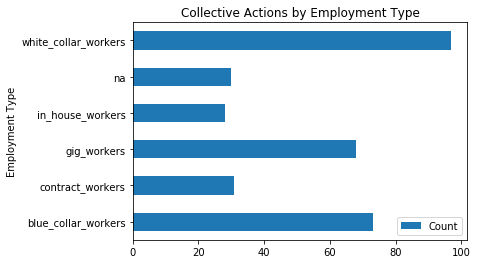

In [28]:
workers = ['blue_collar_workers', 'contract_workers', 'gig_workers', 'in_house_workers', 'na', 'white_collar_workers']

workers_count = []
for w in workers:
    workers_count.append(sum(df["employment_types"].str.contains(w)))
    
workers_df = pd.DataFrame({"Employment Type": workers, "Count": workers_count})

workers_df.plot(kind = "barh", x = "Employment Type", y = "Count", title = "Collective Actions by Employment Type")
plt.show()

## Struggles

In [34]:
df.groupby(["struggles"]).count()["id"].index

Index(['['discrimination', 'ethics']',
       '['discrimination', 'pay_and_benefits']', '['discrimination']',
       '['ethics', 'discrimination']',
       '['ethics', 'working conditions', 'unfair_labor_practices']',
       '['ethics', 'working conditions']', '['ethics']',
       '['job_security', 'discrimination']',
       '['job_security', 'pay_and_benefits']',
       '['job_security', 'working conditions', 'pay_and_benefits']',
       '['job_security']', '['na']', '['pay_and_benefits', 'discrimination']',
       '['pay_and_benefits', 'job_security']',
       '['pay_and_benefits', 'unfair_labor_practices']',
       '['pay_and_benefits', 'working conditions', 'unfair_labor_practices']',
       '['pay_and_benefits', 'working conditions']', '['pay_and_benefits']',
       '['unfair_labor_practices', 'job_security']',
       '['unfair_labor_practices', 'pay_and_benefits']',
       '['unfair_labor_practices']',
       '['working conditions', 'discrimination']',
       '['working condition

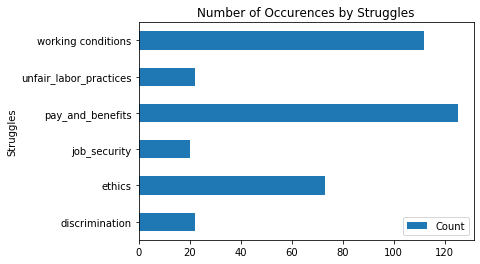

In [35]:
struggles = ['discrimination', 'ethics', 'job_security', 'pay_and_benefits', 
             'unfair_labor_practices', 'working conditions']

struggles_count = []
for s in struggles:
    struggles_count.append(sum(df["struggles"].str.contains(s)))
    
struggles_df = pd.DataFrame({"Struggles": struggles, "Count": struggles_count})

struggles_df.plot(kind = "barh", x = "Struggles", y = "Count", title = "Number of Occurences by Struggles")
plt.show()

## Workers

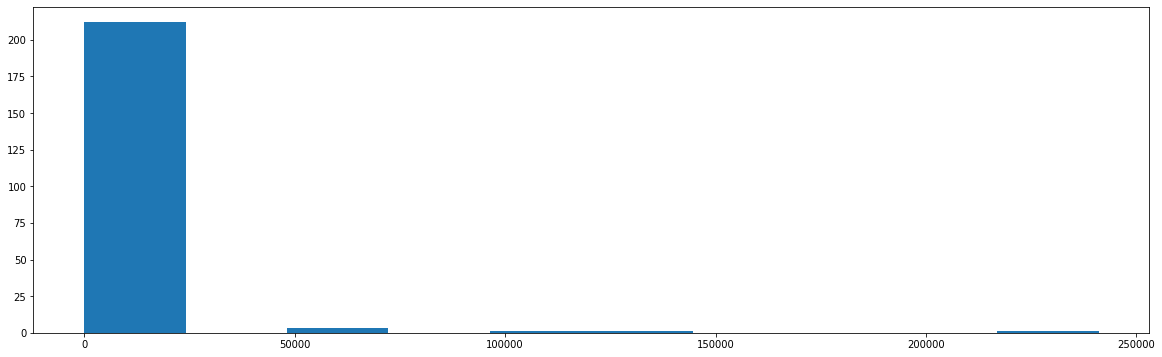

In [77]:
plt.figure(figsize = (20, 6))
workers_as_int = [int(i) for i in df[~(df["workers"] == "None")]["workers"].values]
plt.hist(workers_as_int)
plt.show()

# Notes

- Python does not appear to support **venn diagrams** with more than 3 circles. 
- Find good method to extract unique groups for each column. 

## Misc.

In [38]:
df.columns

Index(['id', 'date', 'sources', 'actions', 'struggles', 'employment_types',
       'description', 'online', 'locations', 'companies', 'workers', 'tags',
       'author', 'latlngs', 'addresses'],
      dtype='object')

In [44]:
df.groupby(["companies"]).count()["id"].index

Index(['None', '['adobe']', '['alibaba']', '['amazon', 'daemo']',
       '['amazon', 'instacart', 'target', 'shipt']',
       '['amazon', 'mechanical_turk']', '['amazon', 'palantir']',
       '['amazon', 'whole_foods']', '['amazon', 'wholefoods']', '['amazon']',
       '['apple', 'yahoo', 'ebay', 'genentech']', '['apple']', '['at&t']',
       '['baidu']', '['blue apron']',
       '['broadcom', 'universal protection service']',
       '['carnegie mellon university', 'palantir']', '['caviar']',
       '['chinese literature', 'tencent']', '['deliveroo', 'foodora', 'uber']',
       '['deliveroo']', '['didi']', '['doordash', 'caviar', 'square']',
       '['doordash']', '['etown']', '['facebook', 'accenture']',
       '['facebook', 'cisco', 'genentech']', '['facebook', 'filter_digital']',
       '['facebook', 'loop transportation']', '['facebook']', '['foodera']',
       '['foodora']', '['foxconn']', '['github', 'microsoft']', '['github']',
       '['glitch']', '['glovo', 'uber', 'rappi', 's

In [42]:
df.groupby(["tags"]).count()["id"].index

Index(['None', '['academics', 'ai']', '['academics', 'law_enforcement']',
       '['academics', 'students', 'climate_change', 'ai']', '['academics']',
       '['ai']', '['antiracism', 'blm', 'moderators']',
       '['antiracism', 'blm', 'trump']', '['antiracism', 'blm']', '['cbp']',
       '['climate_change']', '['climate_strike', 'climate_change']',
       '['coronavirus', 'coworker_solidarity']',
       '['coronavirus', 'delivery_workers']',
       '['coronavirus', 'online_action']', '['coronavirus', 'surveillance']',
       '['coronavirus']', '['coworker_solidarity', 'coronavirus']',
       '['coworker_solidarity', 'fund_raising', 'coronavirus']',
       '['coworker_solidarity', 'funding_raising', 'twc']',
       '['coworker_solidarity', 'international_solidarity']',
       '['coworker_solidarity', 'sexism']', '['coworker_solidarity']',
       '['coworker_solidartiry', 'retaliation']', '['cwa']',
       '['delivery_workers']', '['drivers']',
       '['ice', 'immigration', 'coronavir

In [5]:
df.groupby(["locations"]).count()

,id,date,sources,actions,struggles,employment_types,description,online,companies,workers,tags,author,latlngs,addresses
locations,,,,,,,,,,,,,,
None,23,23,23,23,23,23,23,23,23,23,23,23,23,23
['austin-texas-usa'],1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['bad hersfeld-germany', 'leipzig-germany', 'graben-germany', 'werne-germany', 'seattle-washington-usa']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['bad hersfeld-germany', 'leipzig-germany', 'koblenz-germany', 'rheinberg-germany', 'werne-germany', 'graben-germany']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['bad hersfeld-germany', 'leipzig-germany']",3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
['wuhan-china'],2,2,2,2,2,2,2,2,2,2,2,2,2,2
"['wuxi-china', 'jiangsu-china']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['xiamen-china', 'fujian-china']",1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [49]:
df.groupby(["addresses"]).count()

,id,date,sources,actions,struggles,employment_types,description,online,locations,companies,workers,tags,author,latlngs
addresses,,,,,,,,,,,,,,
None,85,85,85,85,85,85,85,85,85,85,85,85,85,85
"[""Amazon.fr ORY1, Rue de l'Olivier, Deret Logistique, Saran, Orléans, Loiret, Centre-Val de Loire, France métropolitaine, 45770, France"", 'Amazon, Rue de Charenton, Quartier de Bercy, Paris, Île-de-France, France métropolitaine, 75012, France']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"[""Amazon.fr ORY1, Rue de l'Olivier, Deret Logistique, Saran, Orléans, Loiret, Centre-Val de Loire, France métropolitaine, 45770, France""]",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['1, 东长安街, 北京市, 东城区, 北京市, 100010, China 中国']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['10025, Northeast Cascades Parkway, Portland, Multnomah County, Oregon, 97220, United States of America']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['华三通信, 长河街道, 杭州市, 浙江省, China 中国']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['华为技术有限公司, 龙岗区, 深圳市, 广东省, 518100, China 中国']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"['甲骨文大厦, 软件园三号路, 中关村软件园, 东北旺村, 海淀区, 北京市, 100093, China 中国']",1,1,1,1,1,1,1,1,1,1,1,1,1,1
